# Python version of Spark, PySpark: Working in DataFrames

Using your Google Colab Notebook, with PySpark installed, follow along with the code.

Create a Spark session by importing the library and setting the spark variable to the code below:

In [ ]:
# Start Spark session
from pyspark.sql import SparkSession

NOTE
Every time you open a new Google Colab Notebook, run the Spark installation and then start a Spark session. The app name can be different for each notebook.

spark = SparkSession.builder.appName("DataFrameBasics").getOrCreate()

This creates a Spark application called "DataFrameBasics."

Spark enables us to create a DataFrame from scratch by passing in a list of tuples to the createDataFrame method followed by a list of the column names. The show method will display the DataFrame, which is similar to using the head() function in Pandas. Enter and run the following code:

In [ ]:
dataframe = spark.createDataFrame([
                                (0, 'Here is our DataFrame'),
                                (1, 'We are making one from scratch'),
                                (2, 'This will look very similar to a Pandas Dataframe')
                                    
], ['id','words'])

dataframe.show()

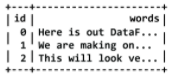

Spark also lets us import data directly into a DataFrame. To do this, we import SparkFiles from the pyspark library that allows us to retrieve files. The next three lines of code tell Spark to pull data from Amazon's Simple Storage Service (S3), a cloud-based data storage service. This boilerplate code can be used to read other public files hosted on Amazon's services. We'll dive more into cloud storage later on in the module.

In the next cell in your Colab notebook, run the following code:

In [ ]:
 Read in data from S3 Buckets
from pyspark import SparkFiles
url = "https://s3.amazonaws.com/dataviz-curriculum/day_1/food.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("food.csv"), sep=",", header=True)

Type the following code to use show() again to display the results, as follows:

In [ ]:
# show DataFrame
df.show()

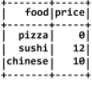

Spark will infer the schema from the data, unless otherwise specified. We can check the schema by running the following code:

In [ ]:
# Print our schema
df.printSchema()

Spark also allows users to view columns and a dataset description by running each of the code blocks:

In [ ]:
# Show the columns
df.columns

In [ ]:
# Describe our data
df.describe()

Notice that the DataFrame is claiming that price is a string. Generally, price is either stored as an integer or floating-point number, so you'll need to change this column.

In this case, we can set our schema and then apply it to the data. We'll start by importing the different types of data with the following code:

In [ ]:
# Import struct fields that we can use
from pyspark.sql.types import StructField, StringType, IntegerType, StructType

Next, create the schema by creating a StructType, which is one of Spark's complex types, like an array or map. The StructField will define the column name, the data type held, and a Boolean to define whether null values will be included or not:

In [ ]:
# Next we need to create the list of struct fields
schema = [StructField("food", StringType(), True), StructField("price", IntegerType(), True),]
schema

Next, enter the code that will pass the schema just created as fields in a StructType. All this will be stored in a variable called final:

In [ ]:
# Pass in our fields
final = StructType(fields=schema)
final

Now that we have a predefined schema, we can read in the data again, only this time passing in our own schema. Type and run the following code in a new notebook cell:

In [ ]:
# Read our data with our new schema
dataframe = spark.read.csv(SparkFiles.get("food.csv"), schema=final, sep=",", header=True)
dataframe.printSchema()

There are a few different ways to access our data with Spark. Run the following commands and look at the results:

In [ ]:
dataframe['price']

In [ ]:
type(dataframe['price'])

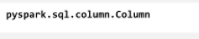

In [ ]:
dataframe.select('price')

In [ ]:
type(dataframe.select('price'))

In [ ]:
dataframe.select('price').show()

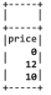

You may notice some similarities to Pandas. For example, in both Pandas and Spark, you can select a column using the DataFrame name, followed by the column's name in square brackets. In Pandas, you can quickly take a look at a DataFrame using head(); in Spark, you can do something similar using show().

NOTE
You might notice that code like dataframe['price'] isn't performing as expected. After running this code, we get the column name, but no results until the show() function runs. show is an action, whereas select is a transformation. We'll cover what this means in the next section.

We can manipulate columns in Spark as well. Run the code below and guess what will be displayed:

In [ ]:
# Add new column
dataframe.withColumn('newprice', dataframe['price']).show()

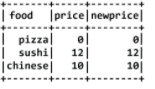

In [ ]:
# Update column name
dataframe.withColumnRenamed('price','newerprice').show()

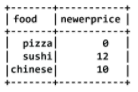

The first cell duplicates the price column into a new column, preserving all its rows, and naming that column newprice. The second cell simply renames the price column as newprice.

The next three cells created a new column, but they performed some operation on the original:



In [ ]:
# Double the price
dataframe.withColumn('doubleprice',dataframe['price']*2).show()

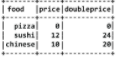

In [ ]:
# Add a dollar to the price
dataframe.withColumn('add_one_dollar',dataframe['price']+1).show()

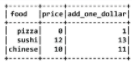

In [ ]:
# Half the price
dataframe.withColumn('half_price',dataframe['price']/2).show()

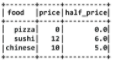